In [ ]:
# sample dataset: 3 "documents" just like HDFS blocks
documents =[
    "bid data analytics requires understanding of distributed systems",
    "mapreduce is a programming model for big data processing",
    "python allows us to simulate the mapreduce workflow easily"
]
documents

['bid data analytics requires understanding of distributed systems',
 'mapreduce is a programming model for big data processing',
 'python allows us to simulate the mapreduce workflow easily']

In [ ]:
def mapper(text):
    words = text.split()
    output = []
    for w in words:
        output.append((w.lower(), 1)) # key-value pair   # this is called mapper
    return output


# Apply mapper to each document
mapped_output =[]
for doc in documents:
    mapped_output.extend(mapper(doc))
mapped_output[:20]

[('bid', 1),
 ('data', 1),
 ('analytics', 1),
 ('requires', 1),
 ('understanding', 1),
 ('of', 1),
 ('distributed', 1),
 ('systems', 1),
 ('mapreduce', 1),
 ('is', 1),
 ('a', 1),
 ('programming', 1),
 ('model', 1),
 ('for', 1),
 ('big', 1),
 ('data', 1),
 ('processing', 1),
 ('python', 1),
 ('allows', 1),
 ('us', 1)]

In [ ]:
from collections import defaultdict

shuffled = defaultdict(list)
for key, value in mapped_output:
    shuffled[key].append(value)

#show the shuffled data for a few keys
dict(list(shuffled.items())[:10])

{'bid': [1],
 'data': [1, 1],
 'analytics': [1],
 'requires': [1],
 'understanding': [1],
 'of': [1],
 'distributed': [1],
 'systems': [1],
 'mapreduce': [1, 1],
 'is': [1]}

In [ ]:
def reducer(key, values):
    return(key, sum(values))
reduced_output =[]

for key, values in shuffled.items():
    reduced_output.append(reducer(key, values))

# sort alphabetically for display
reduced_output = sorted(reduced_output)
reduced_output[:20]

[('a', 1),
 ('allows', 1),
 ('analytics', 1),
 ('bid', 1),
 ('big', 1),
 ('data', 2),
 ('distributed', 1),
 ('easily', 1),
 ('for', 1),
 ('is', 1),
 ('mapreduce', 2),
 ('model', 1),
 ('of', 1),
 ('processing', 1),
 ('programming', 1),
 ('python', 1),
 ('requires', 1),
 ('simulate', 1),
 ('systems', 1),
 ('the', 1)]

In [ ]:
for word, count in reduced_output:
  print(f"{word}: {count}")


a: 1
allows: 1
analytics: 1
bid: 1
big: 1
data: 2
distributed: 1
easily: 1
for: 1
is: 1
mapreduce: 2
model: 1
of: 1
processing: 1
programming: 1
python: 1
requires: 1
simulate: 1
systems: 1
the: 1
to: 1
understanding: 1
us: 1
workflow: 1


In [ ]:
!wget -O war_and_peace.txt https://www.gutenberg.org/files/2600/2600-0.txt

with open("war_and_peace.txt") as f:
   documents = f.read().split("\n\n")[:20]  #first 20 pharagraph

--2025-11-20 03:31:21--  https://www.gutenberg.org/files/2600/2600-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3359405 (3.2M) [text/plain]
Saving to: ‘war_and_peace.txt’

war_and_peace.txt   100%[===================>]   3.20M  --.-KB/s    in 0.1s    

2025-11-20 03:31:21 (33.7 MB/s) - ‘war_and_peace.txt’ saved [3359405/3359405]



In [ ]:
import pandas as pd
import zipfile
import os

zip_file_path = 'archive (21).zip'
extract_dir = 'extracted_data'

# Create a directory to extract files into, if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract all contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files for the user to choose from
extracted_files = os.listdir(extract_dir)
print(f"Files extracted to '{extract_dir}': {extracted_files}")

# Now, you can load a specific file. For example, to load 'products.txt':
# df = pd.read_csv(os.path.join(extract_dir, 'products.txt'))
# df.head()

Files extracted to 'extracted_data': ['orders_placed_user.txt', 'user_has_creditcard.txt', 'carts_has_products.txt', 'order.txt', 'product_sold_vendor.txt', 'shoppingcart.txt', 'orders_has_products.txt', 'products.txt', 'option.txt', 'products_has_options.txt', 'orders_paid_creditcard.txt', 'user.txt', 'vendor.txt', 'category.txt', 'products_belong_category.txt']


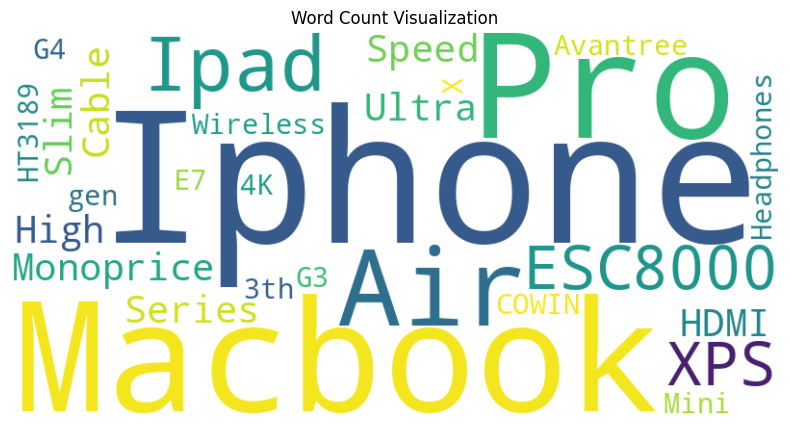

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load a DataFrame from one of the extracted files to define 'df'
df = pd.read_csv(os.path.join('extracted_data', 'products.txt'), encoding='latin1', sep='\t')

# Using 'product_name' column as 'Day', 'Gender', 'Smoker' were not found
text = " ".join(df['product_name'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Count Visualization")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
# The columns 'TotalBill', 'Tips', 'Size' were not found in the DataFrame.
print("Current columns in df:")
print(df.columns)
# sns.heatmap(df[['TotalBill','Tips','Size']].corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()

Current columns in df:
Index(['product_id', 'product_name', 'descriptions'], dtype='object')


<Figure size 600x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
# sns.scatterplot(data=df, x='TotalBill', y='Tips', hue='Gender') # These columns do not exist in the current df
# plt.title("TotalBill vs Tips")
# plt.show()
print("The DataFrame 'df' does not contain 'TotalBill', 'Tips', or 'Gender' columns. Current columns are:")
print(df.columns)

The DataFrame 'df' does not contain 'TotalBill', 'Tips', or 'Gender' columns. Current columns are:
Index(['product_id', 'product_name', 'descriptions'], dtype='object')


<Figure size 800x500 with 0 Axes>

In [ ]:
# The columns 'Tips' and 'TotalBill' are not found in the current DataFrame.
# df['TipPercent'] = (df['Tips'] / df['TotalBill']) * 100

# plt.figure(figsize=(8,5))
# sns.histplot(df['TipPercent'], kde=True)
# plt.title("Tip Percentage Distribution")
# plt.show()
print("The DataFrame 'df' does not contain 'Tips' or 'TotalBill' columns. Current columns are:")
print(df.columns)

The DataFrame 'df' does not contain 'Tips' or 'TotalBill' columns. Current columns are:
Index(['product_id', 'product_name', 'descriptions'], dtype='object')


In [ ]:
plt.figure(figsize=(7,4))
# sns.barplot(data=df, x='Day', y='Tips', estimator='mean') # 'Day' and 'Tips' columns do not exist
# plt.title("Average Tips by Day")
# plt.show()
print("The DataFrame 'df' does not contain 'Day' or 'Tips' columns. Current columns are:")
print(df.columns)

The DataFrame 'df' does not contain 'Day' or 'Tips' columns. Current columns are:
Index(['product_id', 'product_name', 'descriptions'], dtype='object')


<Figure size 700x400 with 0 Axes>

File ‘/content/tips.csv’ already there; not retrieving.
Rows,Cols: (244, 8)


,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


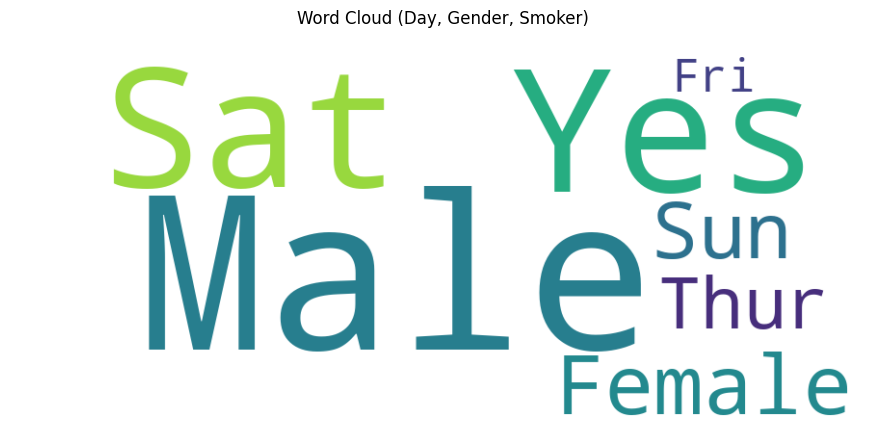

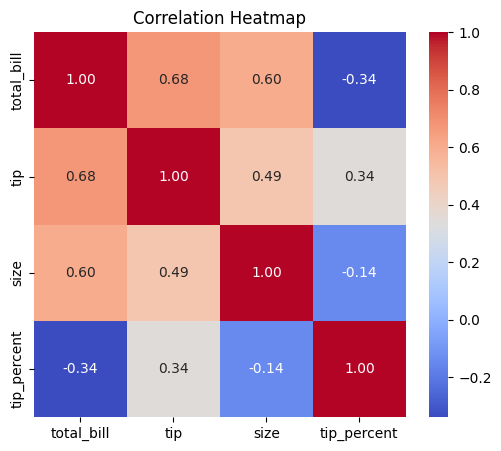

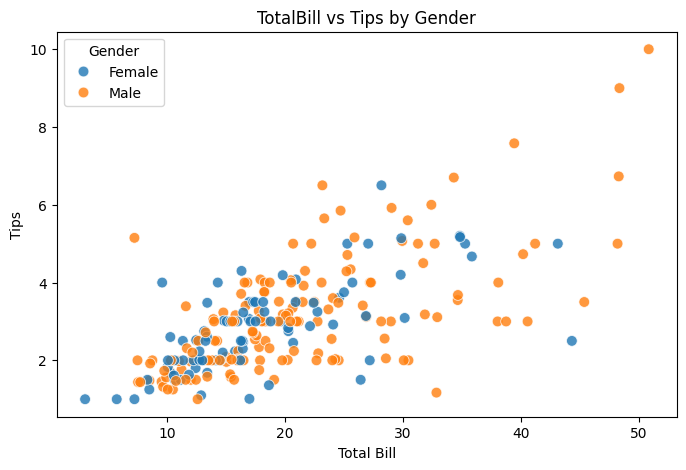

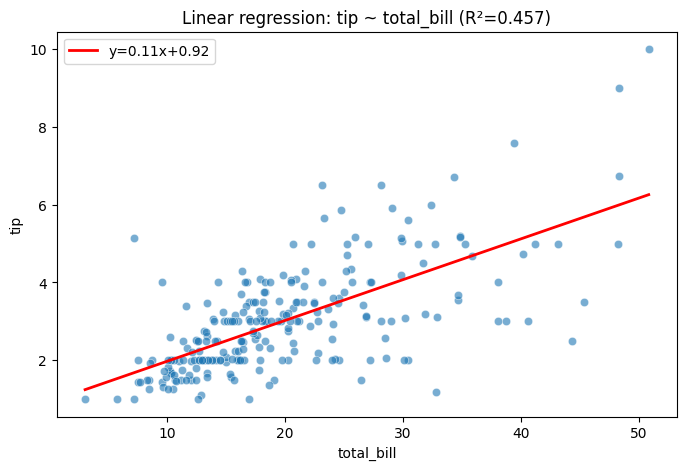

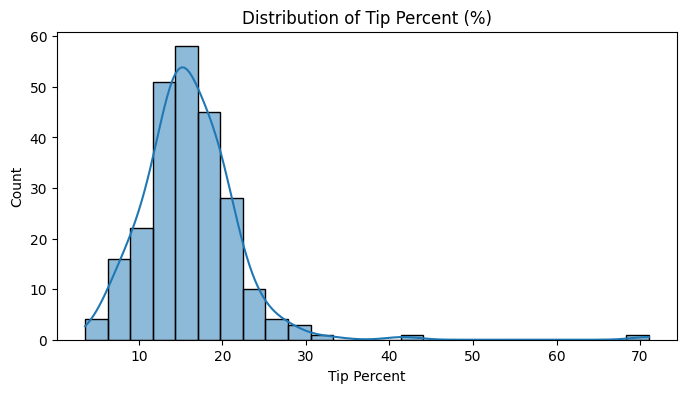

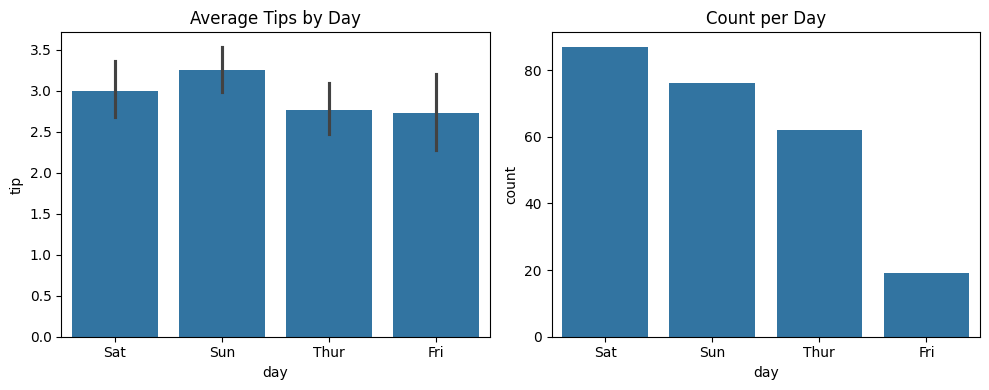

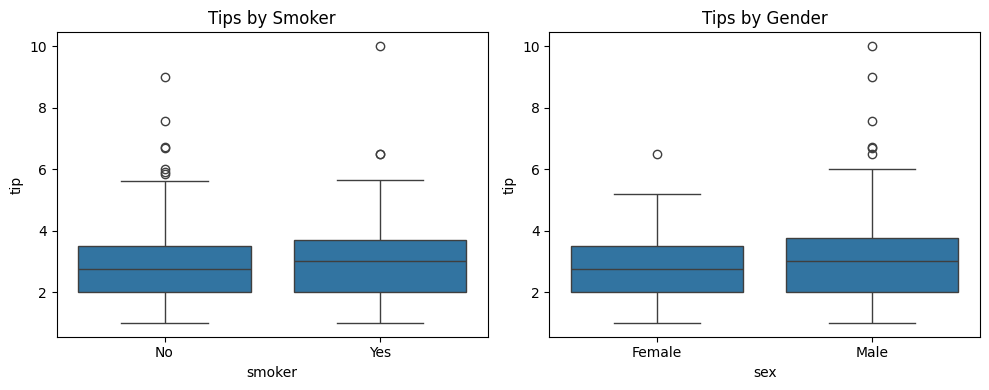

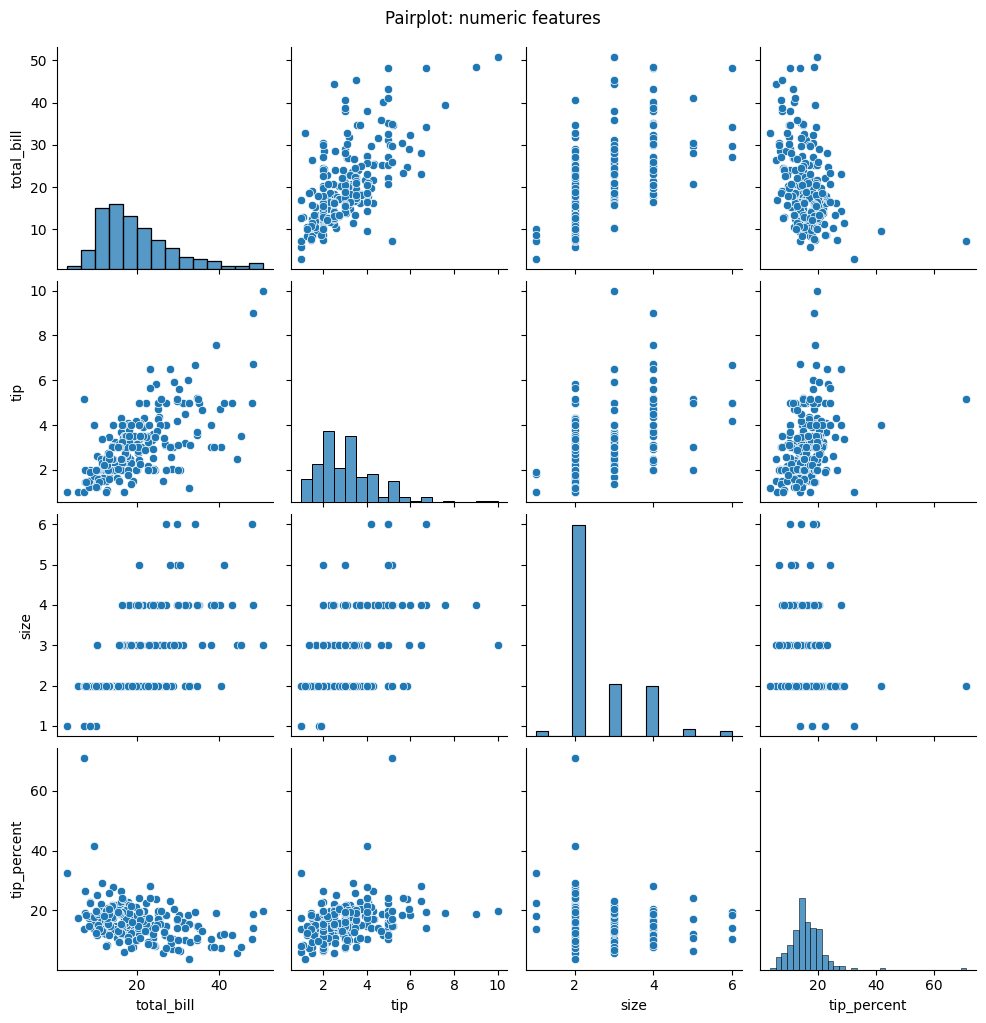

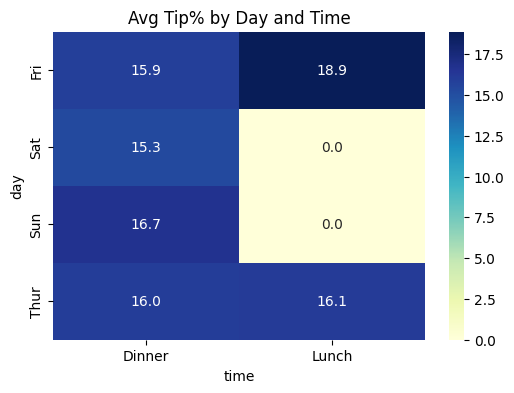

Animation saved to tb_tips_animation.gif


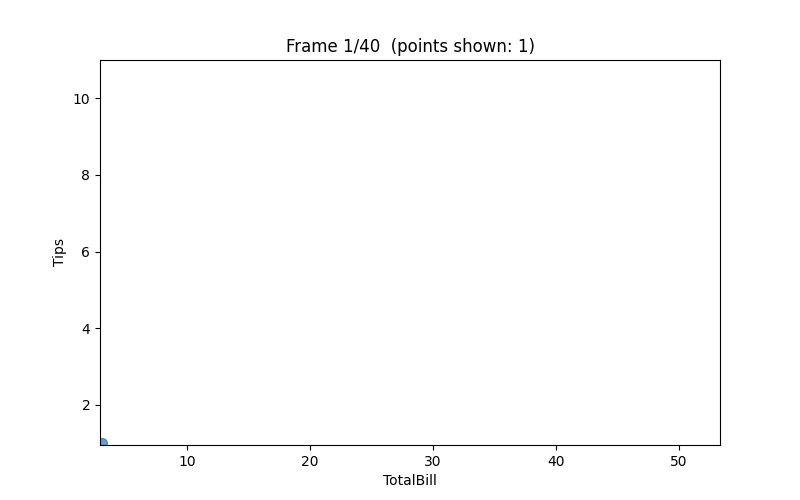

Saved processed dataset to: tips_with_features.csv

Correlation matrix (numeric):
              total_bill    tip  tip_percent   size
total_bill        1.000  0.676       -0.339  0.598
tip               0.676  1.000        0.342  0.489
tip_percent      -0.339  0.342        1.000 -0.143
size              0.598  0.489       -0.143  1.000

Linear regression slope (tip ~ total_bill): 0.105, intercept 0.920, R^2=0.457


In [ ]:
# Single-cell Colab / Jupyter script: many visualizations for Tips dataset
# Make sure this file exists at: /mnt/data/Tips.csv (1).csv
# Paste into one cell in Colab and run.

# 0) Install missing libs (uncomment if needed in Colab)
# !pip install wordcloud plotly kaleido

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import animation
from IPython.display import HTML, Image, display
import plotly.express as px
import os

# Download the Tips.csv file if it's not present
# This resolves the FileNotFoundError by providing the dataset.
!wget -nc https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv -O /content/tips.csv

# 1) Load dataset
# Update the path to point to the downloaded file
path = "/content/tips.csv"   # <-- uses your uploaded file path
df = pd.read_csv(path)
# quick clean and ensure columns names are usable
df.columns = [c.strip().lower() for c in df.columns] # Convert all to lowercase
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
print("Rows,Cols:", df.shape)
display(df.head())

# 2) Word Count Visualization (WordCloud) - using categorical fields Day, Gender, Smoker
text = " ".join(df['day'].astype(str).fillna('')) + " " + \
       " ".join(df['sex'].astype(str).fillna('')) + " " + \
       " ".join(df['smoker'].astype(str).fillna(''))
wc = WordCloud(width=900, height=400, background_color='white', collocations=False).generate(text)

plt.figure(figsize=(12,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Day, Gender, Smoker)")
plt.show()

# 3) Correlation heatmap (TotalBill, Tips, Size, TipPercent)
plt.figure(figsize=(6,5))
sns.heatmap(df[['total_bill','tip','size','tip_percent']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4) Scatter plot TotalBill vs Tips colored by Gender (matplotlib + seaborn)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', s=60, alpha=0.8)
plt.title("TotalBill vs Tips by Gender")
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.legend(title="Gender")
plt.show()

# 5) Regression: linear fit line (TotalBill -> Tips)
from sklearn.linear_model import LinearRegression
X = df[['total_bill']].values
y = df['tip'].values
lr = LinearRegression().fit(X, y)
slope = lr.coef_[0]; intercept = lr.intercept_
r2 = lr.score(X, y)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_bill'], y=df['tip'], alpha=0.6)
xseq = np.linspace(df['total_bill'].min(), df['total_bill'].max(), 100)
plt.plot(xseq, lr.predict(xseq.reshape(-1,1)), color='red', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")
plt.title(f"Linear regression: tip ~ total_bill (R²={r2:.3f})")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.legend()
plt.show()

# 6) Distribution / Histogram of Tip Percent
plt.figure(figsize=(8,4))
sns.histplot(df['tip_percent'], kde=True, bins=25)
plt.title("Distribution of Tip Percent (%)")
plt.xlabel("Tip Percent")
plt.show()

# 7) Average Tips by Day (bar chart) + Countplot of Days
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
order_days = df['day'].value_counts().index.tolist()
sns.barplot(data=df, x='day', y='tip', estimator='mean', order=order_days)
plt.title("Average Tips by Day")
plt.subplot(1,2,2)
sns.countplot(data=df, x="day", order=order_days)
plt.title("Count per Day")
plt.tight_layout()
plt.show()

# 8) Boxplots: Tips by Smoker and by Gender
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='smoker', y='tip')
plt.title("Tips by Smoker")
plt.subplot(1,2,2)
sns.boxplot(data=df, x='sex', y='tip')
plt.title("Tips by Gender")
plt.tight_layout()
plt.show()

# 9) Pairplot for key numeric features
sns.pairplot(df[['total_bill','tip','size','tip_percent']])
plt.suptitle("Pairplot: numeric features", y=1.02)
plt.show()

# 10) Interactive plotly visualization: TipPercent vs TotalBill colored by Day (interactive)
fig = px.scatter(df, x='total_bill', y='tip_percent', color='day',
                 hover_data=['tip','size','sex'], title="Tip% vs TotalBill (interactive)")
fig.update_layout(height=550)
fig.show()

# 11) Categorical heatmap (cross-tab): average TipPercent by Day vs Time
ct = df.pivot_table(index='day', columns='time', values='tip_percent', aggfunc='mean').fillna(0)
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Avg Tip% by Day and Time")
plt.show()

# 12) Animation: moving scatter showing growth / density of TotalBill -> Tips
# We'll make a simple animation that plots a subset of points appearing over frames.
# Note: This is a small, illustrative animation. It will be saved as GIF.

# prepare sorted by TotalBill for stable animation
anim_df = df.sort_values('total_bill').reset_index(drop=True)
N = len(anim_df)
frames = 40
indices = np.linspace(0, N-1, frames, dtype=int)

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter([], [], s=50, alpha=0.7)
ax.set_xlim(anim_df['total_bill'].min()*0.95, anim_df['total_bill'].max()*1.05)
ax.set_ylim(anim_df['tip'].min()*0.95, anim_df['tip'].max()*1.1)
ax.set_xlabel('TotalBill')
ax.set_ylabel('Tips')
plt.title('Animated buildup: TotalBill -> Tips') # Keeping original title text for now as it's a string

def init():
    sc.set_offsets(np.empty((0,2)))
    return (sc,)

def animate(i):
    idx = indices[i]
    data = anim_df.iloc[:idx+1][['total_bill','tip']].values
    sc.set_offsets(data)
    ax.set_title(f'Frame {i+1}/{frames}  (points shown: {len(data)})')
    return (sc,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=120, blit=True)

# Save animation as GIF (uses pillow)
gif_path = "tb_tips_animation.gif"
anim.save(gif_path, writer='pillow', fps=8)
plt.close(fig)  # close inline static figure

print("Animation saved to", gif_path)
display(Image(gif_path))

# 13) Save a small summary CSV with engineered features (optional)
out_path = "tips_with_features.csv"
df.to_csv(out_path, index=False)
print("Saved processed dataset to:", out_path)

# 14) Quick automated insights (very small)
corr = df[['total_bill','tip','tip_percent','size']].corr()
print("\nCorrelation matrix (numeric):\n", corr.round(3))
print(f"\nLinear regression slope (tip ~ total_bill): {slope:.3f}, intercept {intercept:.3f}, R^2={r2:.3f}")

In [ ]:
# ============================================
# STEP 1: UPLOAD TEXT FILE
# ============================================
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import re

uploaded = files.upload()

# Read file (replace with your filename automatically)
file_name = list(uploaded.keys())[0]

with open(file_name, "r", encoding="utf-8") as f:
    text = f.read()

print("File Loaded Successfully!")

# ============================================
# STEP 2: MAPREDUCE IMPLEMENTATION (WORD COUNT)
# ============================================

# ---------- MAP FUNCTION ----------
def mapper(text):
    words = re.findall(r'\b\w+\b', text.lower())
    mapped = []
    for w in words:
        mapped.append((w, 1))
    return mapped

# ---------- SHUFFLE & SORT ----------
def shuffle_sort(mapped):
    grouped = defaultdict(list)
    for word, count in mapped:
        grouped[word].append(count)
    return grouped

# ---------- REDUCER FUNCTION ----------
def reducer(grouped):
    reduced = {}
    for word, counts in grouped.items():
        reduced[word] = sum(counts)
    return reduced

# Run MapReduce
mapped_output = mapper(text)
grouped_output = shuffle_sort(mapped_output)
reduced_output = reducer(grouped_output)

print("MapReduce Word Count Completed!")

# Convert to DataFrame
df_wordcount = pd.DataFrame(list(reduced_output.items()), columns=["Word", "Count"])
df_wordcount = df_wordcount.sort_values(by="Count", ascending=False)

df_wordcount.head(10)


Saving sample_10_page_text.txt to sample_10_page_text (1).txt
File Loaded Successfully!
MapReduce Word Count Completed!


,Word,Count
3,dolorem,108
22,quisquam,108
20,modi,105
8,eius,102
7,dolor,101
10,voluptatem,101
19,est,99
13,etincidunt,98
17,neque,98
16,sit,98


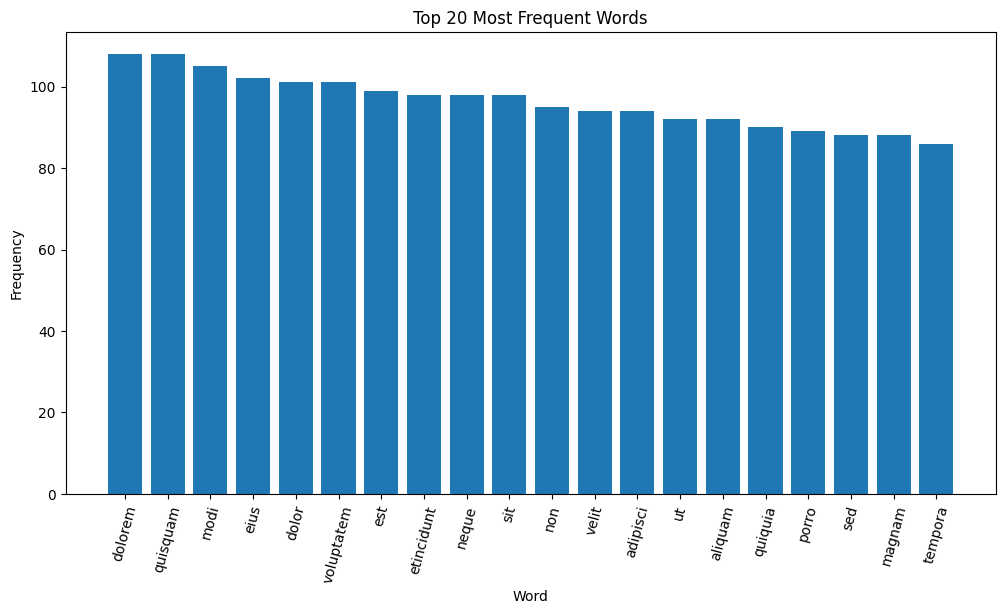

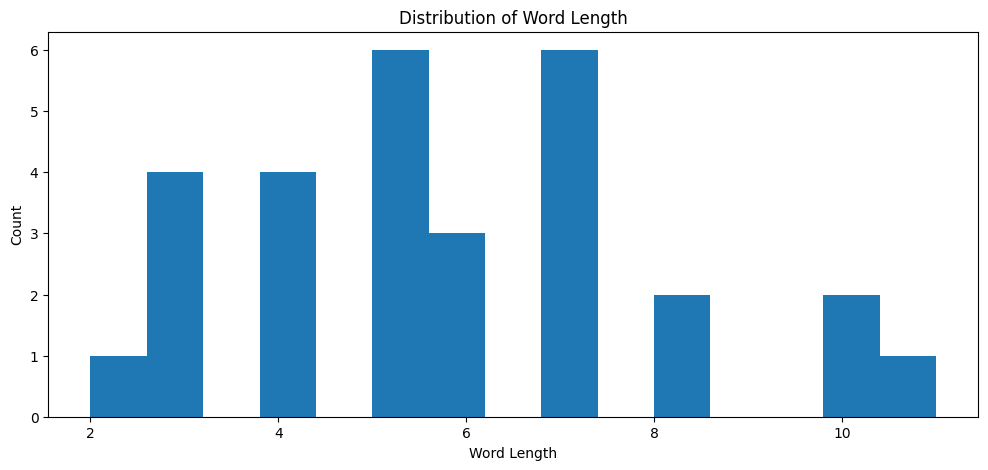

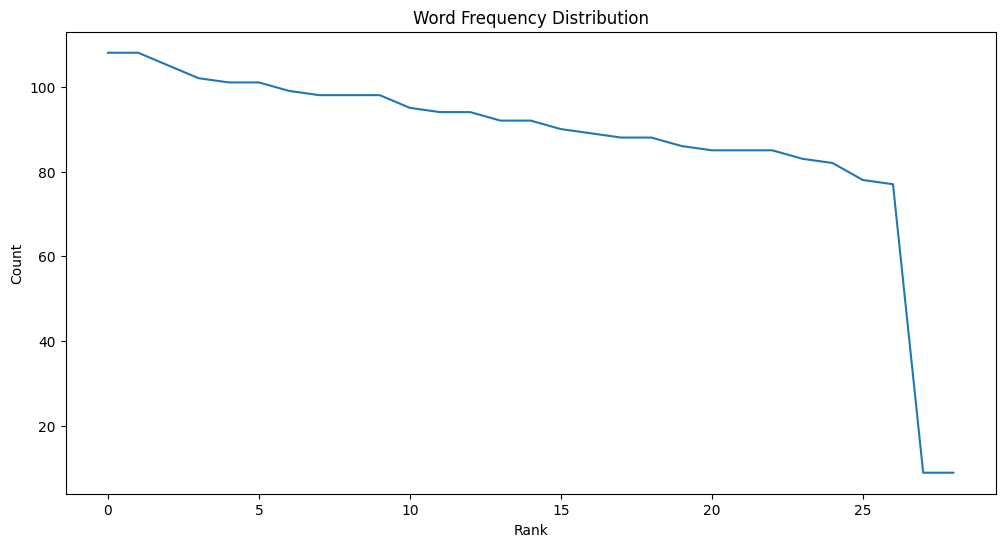

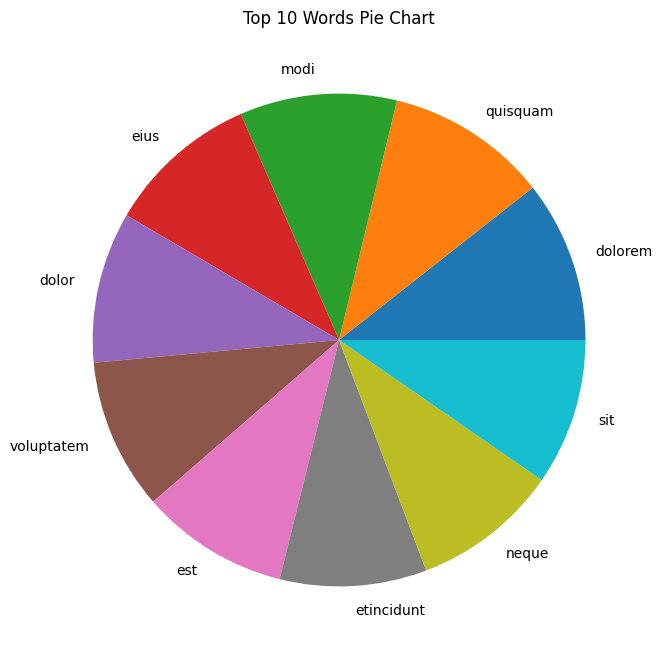

In [ ]:
# ============================================
# TOP 20 WORDCOUNT BARPLOT
# ============================================
top20 = df_wordcount.head(20)

plt.figure(figsize=(12,6))
plt.bar(top20["Word"], top20["Count"])
plt.xticks(rotation=75)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

# ============================================
# WORD LENGTH DISTRIBUTION
# ============================================
df_wordcount['Word_Length'] = df_wordcount['Word'].apply(len)

plt.figure(figsize=(12,5))
plt.hist(df_wordcount['Word_Length'], bins=15)
plt.title("Distribution of Word Length")
plt.xlabel("Word Length")
plt.ylabel("Count")
plt.show()

# ============================================
# FREQUENCY DISTRIBUTION (Zipf-like curve)
# ============================================
plt.figure(figsize=(12,6))
plt.plot(df_wordcount["Count"].values)
plt.title("Word Frequency Distribution")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

# ============================================
# PIE CHART – TOP 10 WORDS
# ============================================
top10 = df_wordcount.head(10)
plt.figure(figsize=(8,8))
plt.pie(top10["Count"], labels=top10["Word"])
plt.title("Top 10 Words Pie Chart")
plt.show()


File ‘/content/tips.csv’ already there; not retrieving.
Dashboard Data Loaded (First 5 rows):


,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,17,1,Female,No,Sun,Dinner,2,6
1,10,2,Male,No,Sun,Dinner,3,16
2,21,4,Male,No,Sun,Dinner,3,17
3,24,3,Male,No,Sun,Dinner,2,14
4,25,4,Female,No,Sun,Dinner,4,15


--------------------------------------------------


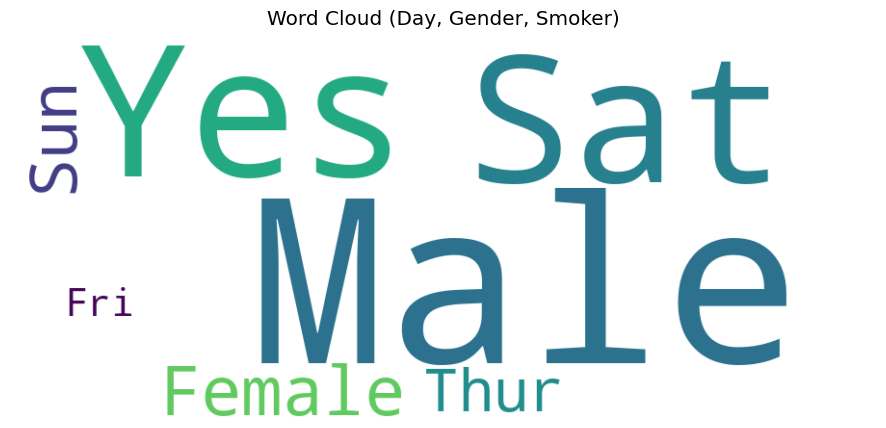

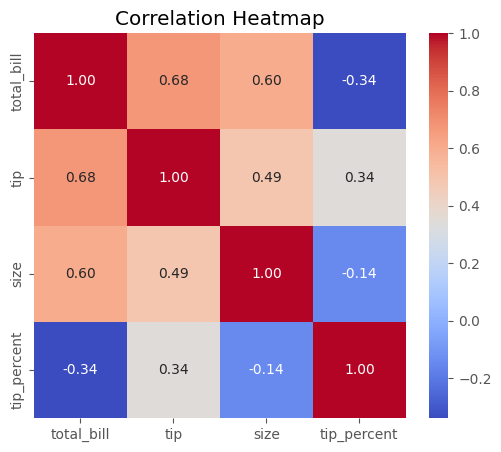

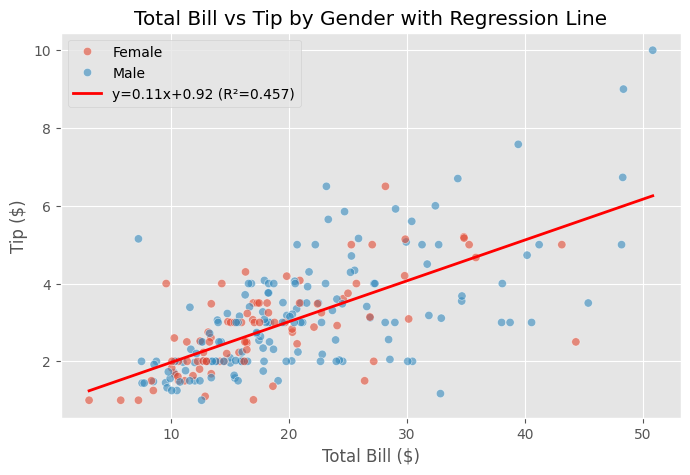

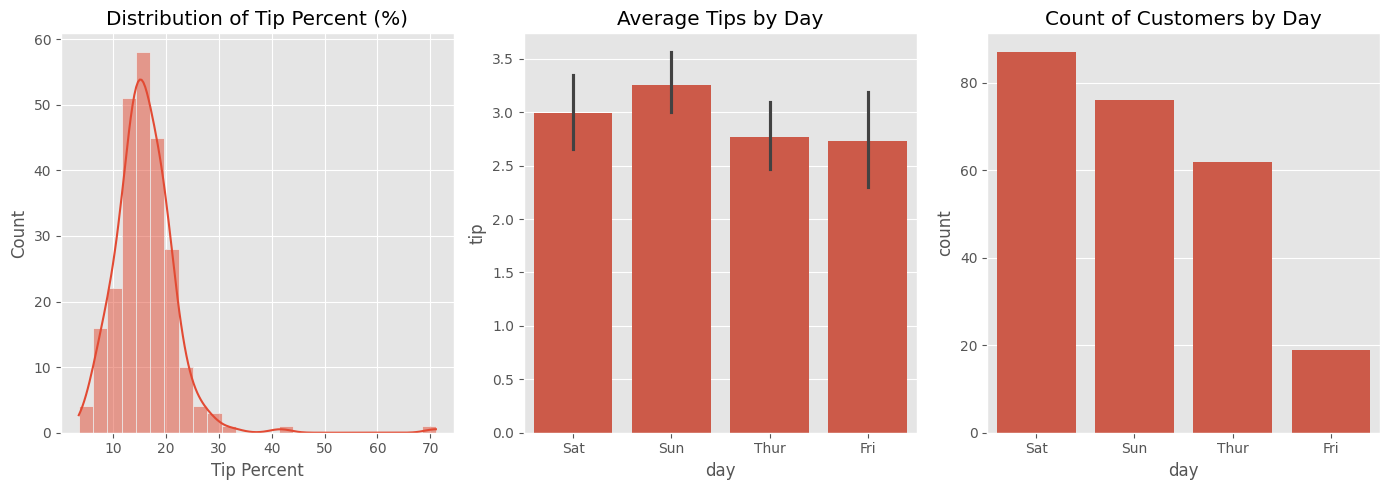

--------------------------------------------------
Animated Simulation: Total Bill vs Tip over Time of Day


In [54]:
# 0) Install missing libs (uncomment and run if needed in Colab)
# !pip install wordcloud plotly kaleido

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from IPython.display import display

# --- 1) Load Dataset and Initial Processing ---
# Download the Tips.csv file, which is publicly available and used in the original notebook structure.
!wget -nc https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv -O /content/tips.csv

path = "/content/tips.csv"
df = pd.read_csv(path)

# Quick clean and ensure columns names are usable
df.columns = [c.strip().lower() for c in df.columns]
# Calculate the 'tip_percent' for analysis
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100

print("Dashboard Data Loaded (First 5 rows):")
display(df.head())
print("-" * 50)

# --- 2) Word Count Visualization (WordCloud) ---
# Create a WordCloud using categorical features like day, sex, and smoker.
text = " ".join(df['day'].astype(str).fillna('')) + " " + \
       " ".join(df['sex'].astype(str).fillna('')) + " " + \
       " ".join(df['smoker'].astype(str).fillna(''))

wc = WordCloud(width=900, height=400, background_color='white', collocations=False).generate(text)

plt.figure(figsize=(12,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Day, Gender, Smoker)")
plt.show()

# --- 3) Correlation Heatmap ---
# Visualize the relationships between numerical features.
plt.figure(figsize=(6,5))
sns.heatmap(df[['total_bill','tip','size','tip_percent']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# --- 4) Scatter Plot and Linear Regression ---
# Visualize the relationship between total_bill and tip, and add a linear trend line.
from sklearn.linear_model import LinearRegression
X = df[['total_bill']].values
y = df['tip'].values
lr = LinearRegression().fit(X, y)
slope = lr.coef_[0]; intercept = lr.intercept_
r2 = lr.score(X, y)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', alpha=0.6) # Added data=df and passed column names as strings
xseq = np.linspace(df['total_bill'].min(), df['total_bill'].max(), 100)
plt.plot(xseq, lr.predict(xseq.reshape(-1,1)), color='red', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f} (R²={r2:.3f})")
plt.title("Total Bill vs Tip by Gender with Regression Line")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()

# --- 5) Distribution and Bar Charts ---
plt.figure(figsize=(14, 5))

# Distribution of Tip Percent
plt.subplot(1, 3, 1)
sns.histplot(df['tip_percent'], kde=True, bins=25)
plt.title("Distribution of Tip Percent (%)")
plt.xlabel("Tip Percent")

# Average Tips by Day
plt.subplot(1, 3, 2)
order_days = df['day'].value_counts().index.tolist()
sns.barplot(data=df, x='day', y='tip', estimator='mean', order=order_days)
plt.title("Average Tips by Day")

# Countplot of Days
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="day", order=order_days)
plt.title("Count of Customers by Day")

plt.tight_layout()
plt.show()

# --- 6) Animated Simulation (Scatter Plot) using Plotly Express ---
# This animated simulation shows how the relationship between total bill and tip
# changes based on whether it is Lunch or Dinner.
print("-" * 50)
print("Animated Simulation: Total Bill vs Tip over Time of Day")

# Sort data for a smoother animation transition
df_sorted = df.sort_values(by=['time'])

# Create the animated scatter plot
# The 'animation_frame' parameter creates the animation.
fig = px.scatter(
    df_sorted,
    x="total_bill",
    y="tip",
    color="sex",
    animation_frame="time",
    animation_group="day",
    size="size",
    hover_name="day",
    title="Tip Amount vs Total Bill (Animated by Time of Day)",
    labels={"total_bill": "Total Bill ($)", "tip": "Tip ($)"}
)

# Configure the plot layout
fig.update_layout(height=500, width=900)

# Display the interactive animation (only works in environments like Colab/Jupyter)
fig.show()

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import re

uploaded = files.upload()

# Read file (replace with your filename automatically)
file_name = list(uploaded.keys())[0]

with open(file_name, "r", encoding="utf-8") as f:
    text = f.read()

print("File Loaded Successfully!")

# ---------- MAP FUNCTION ----------
def mapper(text):
    words = re.findall(r'\b\w+\b', text.lower())
    mapped = []
    for w in words:
        mapped.append((w, 1))
    return mapped

# ---------- SHUFFLE & SORT ----------
def shuffle_sort(mapped):
    grouped = defaultdict(list)
    for word, count in mapped:
        grouped[word].append(count)
    return grouped

# ---------- REDUCER FUNCTION ----------
def reducer(grouped):
    reduced = {}
    for word, counts in grouped.items():
        reduced[word] = sum(counts)
    return reduced

# Run MapReduce
mapped_output = mapper(text)
grouped_output = shuffle_sort(mapped_output)
reduced_output = reducer(grouped_output)

print("MapReduce Word Count Completed!")

# Convert to DataFrame
df_wordcount = pd.DataFrame(list(reduced_output.items()), columns=["Word", "Count"])
df_wordcount = df_wordcount.sort_values(by="Count", ascending=False)

df_wordcount.head(10)

Saving carts_has_products.txt to carts_has_products (1).txt
Saving category.txt to category (1).txt
Saving option.txt to option (1).txt
Saving order.txt to order (1).txt
Saving orders_has_products.txt to orders_has_products (1).txt
Saving orders_paid_creditcard.txt to orders_paid_creditcard (1).txt
Saving orders_placed_user.txt to orders_placed_user (1).txt
Saving product_sold_vendor.txt to product_sold_vendor (1).txt
Saving products.txt to products (1).txt
Saving products_belong_category.txt to products_belong_category (1).txt
Saving products_has_options.txt to products_has_options (1).txt
Saving shoppingcart.txt to shoppingcart (1).txt
Saving user.txt to user (1).txt
Saving user_has_creditcard.txt to user_has_creditcard (1).txt
Saving vendor.txt to vendor (1).txt
File Loaded Successfully!
MapReduce Word Count Completed!


,Word,Count
9,1,12
7,2,10
12,3,8
35,3400,6
14,3100,4
4,3000,4
21,3200,4
45,3500,4
52,3600,4
28,3300,4
